(<Figure size 432x288 with 1 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x12bafe390>)

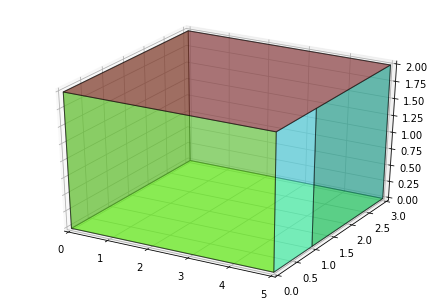

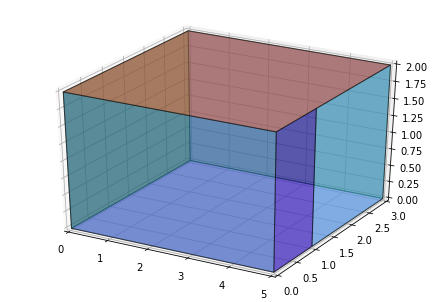

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra

corners = np.array([[0,0], [0,3], [5,3], [5,1], [5,0]]).T  # [x,y]
room = pra.Room.from_corners(corners)
room = pra.Room.from_corners(corners)
room.extrude(2.)

fig, ax = room.plot()
ax.set_xlim([0, 5])
ax.set_ylim([0, 3])
ax.set_zlim([0, 2]);
room.plot()
